<a href="https://colab.research.google.com/github/Rahul786Patidar/Face_mask_detection_using_CNN/blob/main/Face_mask_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 158M/163M [00:01<00:00, 167MB/s]
100% 163M/163M [00:01<00:00, 152MB/s]


In [4]:
# extracting the compressed dataset
from zipfile import ZipFile

data = '/content/face-mask-dataset.zip'

with ZipFile(data, 'r') as zip:
    zip.extractall()
    print('The data is extracted')


The data is extracted


In [5]:
!ls

data  download_mask.jpg  drive	face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2172.jpg', 'with_mask_1882.jpg', 'with_mask_2006.jpg', 'with_mask_97.jpg', 'with_mask_3636.jpg']
['with_mask_763.jpg', 'with_mask_1698.jpg', 'with_mask_1272.jpg', 'with_mask_509.jpg', 'with_mask_2296.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3341.jpg', 'without_mask_1907.jpg', 'without_mask_3083.jpg', 'without_mask_2094.jpg', 'without_mask_2152.jpg']
['without_mask_3593.jpg', 'without_mask_3145.jpg', 'without_mask_3398.jpg', 'without_mask_574.jpg', 'without_mask_3192.jpg']


In [9]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**


with mask --->1

without mask --->0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

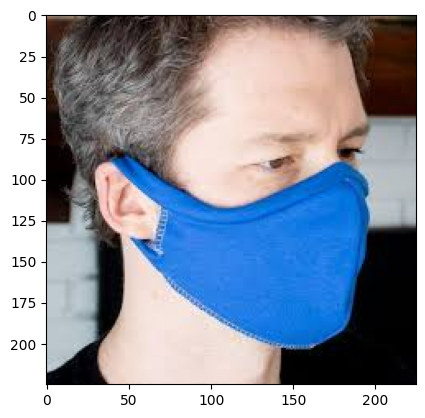

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2702.jpg')
imgplot = plt.imshow(img)
plt.show()

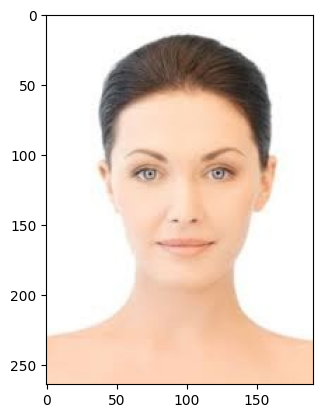

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1025.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**
1. Resize the Images
2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays
with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[146,  93,  43],
        [146,  93,  43],
        [148,  95,  45],
        ...,
        [161, 110,  63],
        [154, 106,  59],
        [151, 107,  60]],

       [[147,  94,  44],
        [147,  94,  44],
        [149,  96,  46],
        ...,
        [161, 110,  63],
        [156, 108,  61],
        [154, 110,  63]],

       [[147,  94,  44],
        [147,  94,  44],
        [149,  96,  46],
        ...,
        [161, 110,  63],
        [157, 110,  63],
        [158, 114,  66]],

       ...,

       [[ 31,  34,  25],
        [ 31,  34,  25],
        [ 30,  33,  24],
        ...,
        [178, 124,  77],
        [176, 122,  77],
        [175, 121,  77]],

       [[ 32,  34,  26],
        [ 32,  34,  25],
        [ 31,  33,  24],
        ...,
        [175, 121,  75],
        [175, 122,  75],
        [175, 122,  77]],

       [[ 34,  35,  27],
        [ 33,  34,  26],
        [ 32,  33,  25],
        ...,
        [172, 118,  69],
        [173, 121,  73],
        [176, 125,  78]]], dtype=uint8)
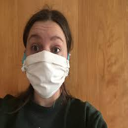

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy array

X = np.array(data)
y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(y)

numpy.ndarray

In [25]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
 # scaling the data

 X_train_scaled = X_train/255
 X_test_scaled = X_test/255

array([[[244, 242, 231],
        [243, 241, 235],
        [247, 246, 245],
        ...,
        [246, 242, 243],
        [238, 236, 238],
        [243, 242, 244]],

       [[242, 241, 237],
        [247, 248, 247],
        [231, 234, 237],
        ...,
        [176, 167, 172],
        [179, 168, 175],
        [182, 170, 178]],

       [[248, 248, 249],
        [242, 245, 248],
        [222, 228, 233],
        ...,
        [155, 149, 155],
        [160, 148, 157],
        [165, 149, 160]],

       ...,

       [[243, 238, 248],
        [240, 237, 246],
        [239, 236, 241],
        ...,
        [248, 236, 236],
        [234, 216, 222],
        [239, 233, 232]],

       [[243, 236, 243],
        [248, 244, 249],
        [243, 243, 246],
        ...,
        [244, 230, 229],
        [235, 221, 227],
        [239, 242, 240]],

       [[249, 242, 246],
        [246, 243, 246],
        [242, 243, 243],
        ...,
        [236, 226, 227],
        [245, 233, 239],
        [235, 240, 239]]], dtype=uint8)
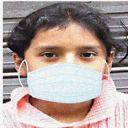

In [30]:
# Before Scaling
X_train[0]

In [31]:
 X_train_scaled[0] # After Scaling

array([[[0.95686275, 0.94901961, 0.90588235],
        [0.95294118, 0.94509804, 0.92156863],
        [0.96862745, 0.96470588, 0.96078431],
        ...,
        [0.96470588, 0.94901961, 0.95294118],
        [0.93333333, 0.9254902 , 0.93333333],
        [0.95294118, 0.94901961, 0.95686275]],

       [[0.94901961, 0.94509804, 0.92941176],
        [0.96862745, 0.97254902, 0.96862745],
        [0.90588235, 0.91764706, 0.92941176],
        ...,
        [0.69019608, 0.65490196, 0.6745098 ],
        [0.70196078, 0.65882353, 0.68627451],
        [0.71372549, 0.66666667, 0.69803922]],

       [[0.97254902, 0.97254902, 0.97647059],
        [0.94901961, 0.96078431, 0.97254902],
        [0.87058824, 0.89411765, 0.91372549],
        ...,
        [0.60784314, 0.58431373, 0.60784314],
        [0.62745098, 0.58039216, 0.61568627],
        [0.64705882, 0.58431373, 0.62745098]],

       ...,

       [[0.95294118, 0.93333333, 0.97254902],
        [0.94117647, 0.92941176, 0.96470588],
        [0.9372549 , 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

In [34]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
#Training the neural network
history = model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 [==============================] - 10s 24ms/step - loss: 0.4794 - acc: 0.7901 - val_loss: 0.3253 - val_acc: 0.8579
Epoch 2/10
170/170 [==============================] - 4s 21ms/step - loss: 0.3224 - acc: 0.8678 - val_loss: 0.2581 - val_acc: 0.8777
Epoch 3/10
170/170 [==============================] - 3s 18ms/step - loss: 0.2513 - acc: 0.9007 - val_loss: 0.2326 - val_acc: 0.8992
Epoch 4/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2239 - acc: 0.9108 - val_loss: 0.2393 - val_acc: 0.9025
Epoch 5/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2174 - acc: 0.9137 - val_loss: 0.2223 - val_acc: 0.9008
Epoch 6/10
170/170 [==============================] - 4s 21ms/step - loss: 0.1728 - acc: 0.9331 - val_loss: 0.1905 - val_acc: 0.9157
Epoch 7/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1362 - acc: 0.9474 - val_loss: 0.2146 - val_acc: 0.9157
Epoch 8/10
170/170 [==============================] - 3s 18ms/step -

**Model Evaluation**

In [36]:
loss,accuracy = model.evaluate(X_test_scaled,y_test)
print('Test Accuracy =',accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1850 - acc: 0.9371
Test Accuracy = 0.9371277093887329


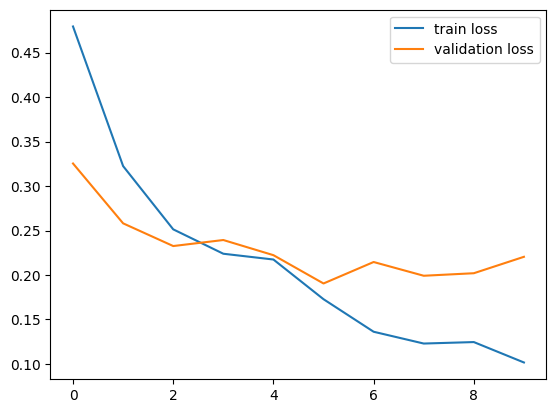

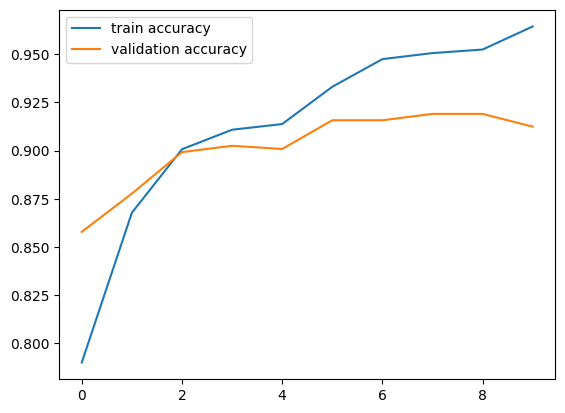

In [37]:
h = history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted/content/business_mask.webp


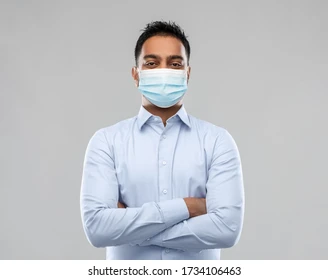

1/1 [==============================] - 0s 19ms/step
[[0.7536708 0.3231558]]
0
The person in the image is not wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==1:

  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')